# Figure 2 A

In [1]:
import os
os.chdir('C:\\Users\\godnean\\Desktop\\HPP_resource\\Figure2')

C:\Users\godnean\PycharmProjects\HPP_resource_code\utils.py:615: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=[f'{x:.0f}' for x in ax.get_yticks()], fontsize=FONTSIZE)
C:\Users\godnean\PycharmProjects\HPP_resource_code\utils.py:615: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=[f'{x:.0f}' for x in ax.get_yticks()], fontsize=FONTSIZE)


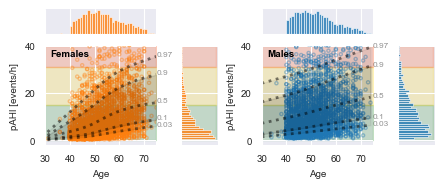

C:\Users\godnean\PycharmProjects\HPP_resource_code\utils.py:615: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=[f'{x:.0f}' for x in ax.get_yticks()], fontsize=FONTSIZE)
C:\Users\godnean\PycharmProjects\HPP_resource_code\utils.py:615: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=[f'{x:.0f}' for x in ax.get_yticks()], fontsize=FONTSIZE)


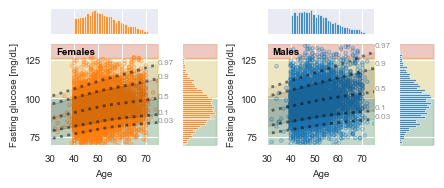

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils import GenderAgeRefPlot

# Define directories path:


#Reference plots for pAHI with severity thresholds
data2 = pd.read_csv(os.path.join( f'all_longest_night_sleep_in_first_visit_df.csv'),
                    index_col=[0, 1])


ref_plot = GenderAgeRefPlot(data2, val_col='AHI', age_col="age", sex_col="gender")
ref_plot.plot()
colors = ['forestgreen', 'gold', 'orangered']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
ref_plot.plot_thresholds([0,  15, 31, 100], cmap=cmap,
                         labels=['Normal to mild OSA (<15)', 'Moderate OSA (16-30)', 'Severe OSA (>30)'],
                         legend=False)
plt.savefig(os.path.join( f'Fig2a_pAHI.png'), dpi=300)
plt.show()


# Reference plots for CGM features and fasting glucose with severity thresholds
feature = 'fasting_glucose_mean'
data = pd.read_csv(os.path.join( f'hpp_{feature}[1].csv'), index_col=[0, 1])
data = data.rename(columns={data.columns[0]: feature})
# if feature == 'gmi':
#     data = data.reset_index(level=1, drop=True)
# else:
data = data.reset_index(level=0, drop=True)
data['research_stage'] = 'baseline'
data = data.set_index('research_stage', append=True)
# data = data.join(subjects_age_gender_df, how='inner')

ref_plot = GenderAgeRefPlot(data, val_col=feature, age_col="age", sex_col="sex")
ref_plot.plot()
colors = ['forestgreen', 'gold', 'orangered']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
if feature == 'fasting_glucose_mean':
    ref_plot.plot_thresholds([0, 100, 126, 500], cmap=cmap,
                             labels=['Normal(<100)', 'Prediabetes (100-125)', 'Diabetes (>126)'],
                             legend=False)
elif feature == 'gmi':
    ref_plot.plot_thresholds([0, 5.7, 6.5, 20], cmap=cmap,
                             labels=['Normal(<5.7)', 'Prediabetes (5.7-6.4)', 'Diabetes (>6.5)'])
plt.savefig(os.path.join( f'Fig2a_{feature}.png'), dpi=300)
plt.show()

# Figure 2 B

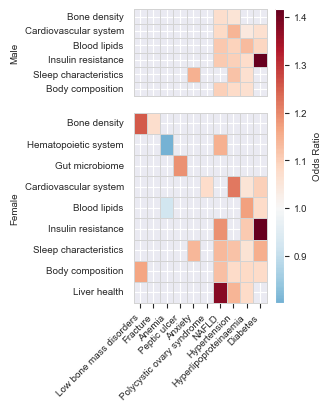

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.chdir('C:\\Users\\godnean\\Desktop\\HPP_resource\\Figure2')


disease_name_dic = {'Diabetes mellitus, type unspecified': 'Diabetes mellitus',
                    'haemolytic anaemia due to G6PD deficiency': 'Haemolytic anaemia',
                    'Anxiety or fear-related disorders': 'Anxiety',
                    'Anaemias or other erythrocyte disorders': 'Anaemia',
                    'Non-alcoholic fatty liver disease': 'NAFLD',
                    'Fracture of unspecified body region': 'Fracture',
                    'Ulcer of stomach or duodenum': 'Peptic ulcer'
                   }


rank_or_z = 'centered' # 'zscore'
def load_dfs():
    df_male = pd.read_csv(os.path.join('medical_conditions_corrs', 
                                       'logit_df_male_equal_%s.csv' % rank_or_z), index_col=0).replace(0, np.nan)\
                        .rename(columns=disease_name_dic)
    df_female = pd.read_csv(os.path.join( 'medical_conditions_corrs', 
                                       'logit_df_female_equal_%s.csv' % rank_or_z), index_col=0).replace(0, np.nan)\
                        .rename(columns=disease_name_dic)
    
    ###df_males and df_females correlations between biological age scores scores and self reported medical conditions as desribed in https://www.nature.com/articles/s43587-024-00734-9#Sec9
    
    df_male.columns = [c.strip() for c in df_male.columns]
    df_female.columns = [c.strip() for c in df_female.columns]
    return df_male, df_female

def plot_heatmap1(ax, df, sex, vmin, vmax, xticklabels=[], colorbar_cax=None):
    mask = df.isnull()
    sns.heatmap(
        df, 
        ax=ax, 
        mask=mask, 
        center=1., 
        cmap='RdBu_r', 
        xticklabels=True, 
        cbar=False, 
        vmin=vmin, 
        vmax=vmax, 
        linewidths=0.5, 
        linecolor='lightgrey', 
        clip_on=False
    )
    
    # Ensuring all y-tick labels are shown
    ax.set_yticks([x+0.5 for x in range(len(df.index))])
    ax.set_yticklabels(df.index, rotation=0, fontsize=7)  # Adjust font size as needed
    
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')
    ax.set_ylabel(sex, fontsize=7)
    ax.tick_params(labelsize=7, left=False, bottom=False)
    
    # Add colorbar if specified
    if colorbar_cax:
        clb = plt.colorbar(ax.get_children()[0], orientation="vertical", aspect=20, cax=colorbar_cax)
        clb.ax.set_ylabel('Odds Ratio', fontsize=7)
        clb.ax.tick_params(labelsize=7)
        ax.tick_params(labelsize=7, left=False, bottom=True)

ax_dict = plt.figure(constrained_layout=True, figsize=(80/25, 100/25)).subplot_mosaic(
    """
    AAAAAAAAAAAAAAAC
    BBBBBBBBBBBBBBBC
    BBBBBBBBBBBBBBBC
    """,
    gridspec_kw={"wspace": 0.2, "hspace": 0},
)



df_male, df_female = load_dfs()


df_male=df_male[[col for col in df_male.columns if col not in ['Cholelithiasis', 'Female infertility']]]
df_female=df_female[[col for col in df_female.columns if col not in ['Cholelithiasis', 'Female infertility']]].dropna(how='all')

vmin = min(df_male.min().min(), df_female.min().min())
vmax = min(df_male.max().max(), df_female.max().max())
plot_heatmap1(ax_dict['A'], 
             df_male.reindex(df_female.index).reindex(df_female.columns, axis=1).dropna(how='all'),
            'Male', vmin=vmin, vmax=vmax)
plot_heatmap1(ax_dict['B'], 
             df_female,
            'Female', vmin=vmin, vmax=vmax, xticklabels=df_female.columns, colorbar_cax=ax_dict['C'])

#ax_dict['A'].text(-0.45, 0.9, 'a', ha='center', va='center', transform=ax_dict['A'].transAxes, fontsize=30, weight='bold')
#ax_dict['B'].text(-0.45, 0.95, 'b', ha='center', va='center', transform=ax_dict['B'].transAxes, fontsize=30, weight='bold')

plt.savefig(os.path.join('figure2b_revision.png'), dpi=300, bbox_inches='tight')
#plt.savefig(os.path.join( 'figure2b_revision.pdf'), dpi=300, bbox_inches='tight')

# Figure 2 C

C:\Users\godnean\AppData\Local\Temp\ipykernel_49452\2064590699.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['bottom']=True
C:\Users\godnean\AppData\Local\Temp\ipykernel_49452\2064590699.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bottom']=False


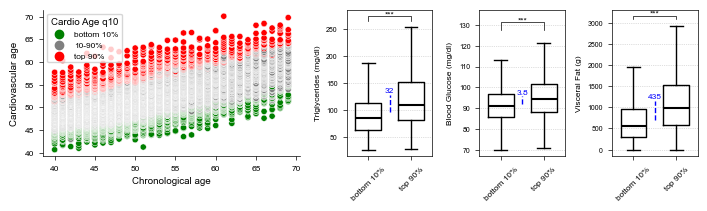

In [10]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
# Set the style to match Nature Medicine guidelines
plt.style.use('default')
plt.rcParams.update({
 'font.sans-serif': ['Arial'],
    'font.size': 7,
    'axes.linewidth': 0.5,
    'axes.labelsize': 7,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 6,
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.spines.right': False,
    'axes.spines.top': False,
})


import matplotlib.pyplot as plt
from scipy import stats
def quantiles(x, q):
    if x <= q+0.02:
        return 'bottom {:.0f}%'.format(100*q)
    elif x > 1-q:
        return 'top {:.0f}%'.format(100*(1-q))
    else:
        return '{:.0f}-{:.0f}%'.format(100*q, 100*(1-q))
def boxplot_with_mannwhitney_final(data1, data2, labels, title, ax=None, save=True):
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    mean1, mean2 = np.mean(data1), np.mean(data2)
    mean_diff = mean2 - mean1
    
    if ax is None:
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(180 / 25.4 / 6 * 1.3, 2), dpi=300)
    
    # Create the boxplot
    bp = ax.boxplot([data1, data2], labels=labels, showfliers=False, widths=0.6)
    
    # Customize the plot
    ax.set_ylabel(title, fontsize=6)
    ax.set_xlabel('', fontsize=6)

    # Set style for median lines
    for median in bp['medians']:
        median.set(color='black', linewidth=1.5)
    
    # Set style for whiskers and caps
    for element in ['whiskers', 'caps']:
        for item in bp[element]:
            item.set(color='black', linewidth=1)
    
    # Find the highest point of the boxes (excluding outliers)
    y_max = max(
        max(bp['boxes'][0].get_ydata()),
        max(bp['boxes'][1].get_ydata()),
        max(bp['caps'][1].get_ydata()),
        max(bp['caps'][3].get_ydata())
    )
    
    # Add asterisks based on the p-value
    annotation_height = y_max + (y_max * 0.08)  # Move p-value annotation lower (15% above the highest point)
    line_height = y_max + (y_max * 0.05)  # Move line lower (10% above the highest point)
    
    if p_value < 0.001:
        annotation = '***'  # p < 0.001
    elif p_value < 0.01:
        annotation = '**'   # p < 0.01
    elif p_value < 0.05:
        annotation = '*'    # p < 0.05
    else:
        annotation = 'n.s.'  # not significant
        
    mean_line_height = min(mean1, mean2)+mean_diff*1.1
    mid_x = 1.5
    ax.plot([mid_x, mid_x], [mean1, mean2], color='blue', linestyle='--', lw=1)
    if abs(mean_diff)>10:
        ax.text(1.5, mean_line_height, f'{mean_diff:.0f}', 
                horizontalalignment='center', verticalalignment='bottom', 
                color='blue', fontweight='normal',fontsize=6)
    else:
        ax.text(1.5, mean_line_height, f'{mean_diff:.1f}', 
        horizontalalignment='center', verticalalignment='bottom', 
        color='blue', fontweight='normal',fontsize=6)
    
    # Display the asterisks above the boxes
    ax.text(1.5, annotation_height, annotation,  # Use the adjusted height for annotation
            horizontalalignment='center', fontweight='normal', fontsize=6)
    
    # Add a line connecting the boxes
    x1, x2 = 1, 2
    ax.plot([x1, x1, x2, x2], [line_height, annotation_height, annotation_height, line_height], lw=0.5, c='black')
    
    # Adjust y-axis to make room for the annotation
    ax.set_ylim(top=annotation_height + (y_max * 0.05))  # Reduce space above the annotation (10% more space)
    
    # Set background color and frame
    ax.set_facecolor('white')
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(0.5)
    
    # Add grid
    ax.grid(True, axis='y', linestyle=':', color='gray', alpha=0.5, linewidth=0.5)
    
    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=5, length=3, width=0.5)
    plt.xticks(rotation=45)
    ax.set_xticklabels(labels, fontweight='normal', fontsize=6)
    
    plt.tight_layout()
    
    if save:
        plt.savefig('resource/{}.png'.format(title[:5]),
                    dpi=300, bbox_inches='tight')


fig = plt.figure(figsize=(180 / 25.4,55/25.4))


met_age =pd.read_csv('predicticted_measured_cardio.csv', index_col=0) ###predicted and measured age and gender from https://www.nature.com/articles/s43587-024-00734-9#Sec9
met_age = met_age[np.logical_and(met_age['age_y']>=40, met_age['age_y']<70)]
met_age.loc[:, 'age_y2'] = 2 * (met_age['age_y'] // 2)
met_age.loc[:, 'met_age_y1'] = met_age.groupby(['age_y', 'gender'])['age'].rank(pct=True)
met_age.loc[:, 'met_age_y2'] = met_age.groupby(['age_y2', 'gender'])['age'].rank(pct=True)
met_age.loc[:, 'met_age_y1_q10'] = met_age.loc[:, 'met_age_y1'].apply(lambda x: quantiles(x, 0.1))
met_age.loc[:, 'met_age_y2_q10'] = met_age.loc[:, 'met_age_y2'].apply(lambda x: quantiles(x, 0.1))

# Create a GridSpec with 2 rows and 2 columns, with the bottom row spanning both columns
met_age=met_age.rename(columns={'met_age_y1_q10':'Cardio Age q10'})
gs = gridspec.GridSpec(1, 4, width_ratios=[3, 1, 1, 1])
# Top-left panel (Panel A)


# Bottom panel (Panel C, wider)
ax = fig.add_subplot(gs[0, 0])  # First column (wider)


color=None
hue='Cardio Age q10'
palette=['green', 'gray', 'red']

ax = sns.scatterplot(ax=ax, data=met_age.sort_values('age'), x='age_y', y='age', color=color, s=20,
                     hue=hue, palette=palette)
_ = plt.setp(ax.get_xticklabels(), fontsize=6)
_ = plt.setp(ax.get_yticklabels(), fontsize=6)
ax.set_ylabel('Cardiovascular age', fontsize=7)
ax.set_xlabel('Chronological age', fontsize=7)


data=pd.read_csv('all_measurements.csv', index_col=0)


bottom_ind=met_age[met_age['Cardio Age q10']=='bottom 10%'].index
up_ind=met_age[met_age['Cardio Age q10']=='top 90%'].index

data1 =data[data.index.isin(bottom_ind)]
data1['bottom']=True
data2 = data[data.index.isin(up_ind)]
data2['bottom']=False
#res_df=data1.append(data2)
res_df=pd.concat([data1, data2], ignore_index=False)

for i,col in enumerate(['Triglycerides (mg/dl)', 'Blood Glucose (mg/dl)', 'Visceral Fat (g)']):
    ax = fig.add_subplot(gs[0, i+1])
    boxplot_with_mannwhitney_final(res_df[res_df['bottom']][col].dropna().values,
                res_df[~res_df['bottom']][col].dropna().values, ['bottom 10%', 'top 90%'], col, ax=ax, save=False)


plt.subplots_adjust(left=0.05, right=3, top=0.2, bottom=0.1, wspace=0.15)
plt.tight_layout()

# Save or show the figure
plt.savefig('cardio_age_revision.png', dpi=400, bbox_inches='tight')

In [11]:
from utils import compare_2_groups
comparison_table1=compare_2_groups(res_df, bottom_ind, up_ind, group1_name='Bottom 10 perc Cardio',
                                   group2_name='Bottom 10 perc Cardio')

comparison_table1.to_csv('Top_and_bottom_comparison_Cardio_Age.csv')

C:\Users\godnean\PycharmProjects\NastyaProject\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\godnean\PycharmProjects\HPP_resource_code\utils.py:134: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison_table['mw_pvalue']=comparison_table['mw_pvalue'].fillna(1)


aa# Figure 2 D

C:\Users\godnean\AppData\Local\Temp\ipykernel_49452\1364386775.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['bottom']=True
C:\Users\godnean\AppData\Local\Temp\ipykernel_49452\1364386775.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bottom']=False


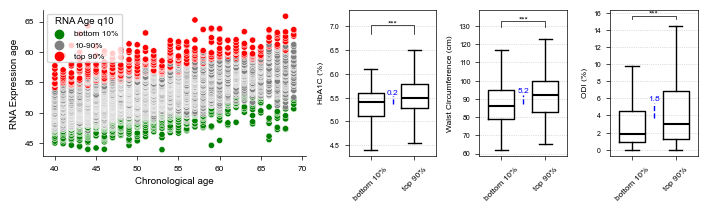

In [7]:

fig = plt.figure(figsize=(180 / 25.4,55/25.4))
met_age =pd.read_csv('predicticted_measured_rna.csv', index_col=0) ###predicted and measured age and gender from https://www.nature.com/articles/s43587-024-00734-9#Sec9
met_age = met_age[np.logical_and(met_age['age_y']>=40, met_age['age_y']<70)]
met_age.loc[:, 'age_y2'] = 2 * (met_age['age_y'] // 2)
met_age.loc[:, 'met_age_y1'] = met_age.groupby(['age_y', 'gender'])['age'].rank(pct=True)
met_age.loc[:, 'met_age_y2'] = met_age.groupby(['age_y2', 'gender'])['age'].rank(pct=True)
met_age.loc[:, 'met_age_y1_q10'] = met_age.loc[:, 'met_age_y1'].apply(lambda x: quantiles(x, 0.1))
met_age.loc[:, 'met_age_y2_q10'] = met_age.loc[:, 'met_age_y2'].apply(lambda x: quantiles(x, 0.1))

# Create a GridSpec with 2 rows and 2 columns, with the bottom row spanning both columns
met_age=met_age.rename(columns={'met_age_y1_q10':'RNA Age q10'})
gs = gridspec.GridSpec(1, 4, width_ratios=[3, 1, 1, 1])
# Top-left panel (Panel A)


# Bottom panel (Panel C, wider)
ax = fig.add_subplot(gs[0, 0])  # First column (wider)


color=None
hue='RNA Age q10'
palette=['green', 'gray', 'red']

ax = sns.scatterplot(ax=ax, data=met_age.sort_values('age'), x='age_y', y='age', color=color, s=20,
                     hue=hue, palette=palette)
_ = plt.setp(ax.get_xticklabels(), fontsize=6)
_ = plt.setp(ax.get_yticklabels(), fontsize=6)
ax.set_ylabel('RNA Expression age', fontsize=7)
ax.set_xlabel('Chronological age', fontsize=7)


data=pd.read_csv('all_measurements.csv', index_col=0)


bottom_ind=met_age[met_age['RNA Age q10']=='bottom 10%'].index
up_ind=met_age[met_age['RNA Age q10']=='top 90%'].index

data1 =data[data.index.isin(bottom_ind)]
data1['bottom']=True
data2 = data[data.index.isin(up_ind)]
data2['bottom']=False
res_df=pd.concat([data1, data2], ignore_index=False)


for i,col in enumerate(['HbA1C (%)', 'Waist Circumference (cm)', 'ODI (%)',]):
    ax = fig.add_subplot(gs[0, i+1])
    boxplot_with_mannwhitney_final(res_df[res_df['bottom']][col].dropna().values,
                res_df[~res_df['bottom']][col].dropna().values, ['bottom 10%', 'top 90%'], col, ax=ax, save=False)


plt.subplots_adjust(left=0.05, right=3, top=0.2, bottom=0.1, wspace=0.15)
plt.tight_layout()

# Save or show the figure
plt.savefig('rna_age_revision.png', dpi=400, bbox_inches='tight')

In [9]:
from utils import compare_2_groups
comparison_table1=compare_2_groups(res_df, bottom_ind, up_ind, group1_name='Bottom 10 perc RNA',
                                   group2_name='Bottom 10 perc RNA')

comparison_table1.to_csv('Top_and_bottom_comparison_RNA_Age.csv')

C:\Users\godnean\PycharmProjects\NastyaProject\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\godnean\PycharmProjects\HPP_resource_code\utils.py:134: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison_table['mw_pvalue']=comparison_table['mw_pvalue'].fillna(1)


# Figure 2 E

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def plot_2_distribution_plot(ax1, data, class_column='label', value_column='pearson_r',
                             title_left='Random individuals samples correlated',
                             title_right='Matched individuals samples correlated',
                             title_below='Phip-seq\nPearson correlation of\n log(fold change) baseline (t=0)\n vs follow-up (t=5 years)',
                             Fdr=None, significant=None, subplot_letter=''):
    # Apply filters if specified
    if significant is not None:
        data = data[data['pearson_pvalue'] <= significant]
    # Plot histograms
    ax2 = ax1.twinx()  # Create twin axis for second plot
    n1, bins1, _ = ax1.hist(data[data[class_column] == "random"][value_column], bins=50, color='#ea9293fe', alpha=1, label=title_left, edgecolor=None, linewidth=0)
    n2, bins2, _ = ax2.hist(data[data[class_column] == "matched"][value_column], bins=50, color='#8ebad9fe', alpha=1, label=title_right, edgecolor=None, linewidth=0)
    ax1.set_xlabel(title_below)
    ax1.set_ylabel("Unmatched", color='#8a3f40')
    ax2.set_ylabel("Matched", color='#385f87')
    ax1.tick_params(axis='y', colors='#8a3f40')
    ax1.tick_params(axis='x', colors="black")
    ax2.tick_params(axis='y', colors='#385f87')


    for spine in ax1.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
    for spine in ax2.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
       

    ax1.grid(False)
    ax2.grid(False)
    # Add letter to the top-left corner of the subplot
    if subplot_letter != '':
        ax1.text(-0.15, 1.1, subplot_letter, transform=ax1.transAxes,
                 fontsize=16, fontweight='bold', va='top', ha='right')

import matplotlib.pyplot as plt

# Convert mm to inches for the figure dimensions
mm_width = 180
# mm_height = 50
inches_width = mm_width / 25.4  # Convert mm to inches
# inches_height = mm_height / 25.4  # Convert mm to inches

# Set font size globally
# plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.size': 8, 'font.family': 'sans-serif'})

# Create a 1x4 figure (4 subplots) with the specified size
# fig, axs = plt.subplots(1, 4, figsize=(inches_width, inches_height))  # Set size in inches
# fig.patch.set_facecolor('white')

# # Set font size globally
# plt.rcParams.update({'font.size': 8, 'font.family': 'sans-serif'})

 
# # Create a 1x4 figure (4 subplots) with the specified width in inches
fig, axs = plt.subplots(1, 4, figsize=(inches_width*1.5, 2.5))  # Adjust height as needed
fig.patch.set_facecolor('white')

# # Create a 2x2 figure (4 subplots)
# fig, axs = plt.subplots(1, 4, figsize=(20, 5))
# fig.patch.set_facecolor('white')

# Flatten the array of axes for easier indexing
axs = axs.ravel()

# Load the CSV file once
file_name = r'correlations_data_phipseq_fill1_preval0.4.csv'
data = pd.read_csv(file_name)
plot_2_distribution_plot(axs[0], data, class_column='label', value_column='pearson_r',title_below='Phip-seq')

file_name = r'longitudinal_stability_sleep.csv'
data = pd.read_csv(file_name)
plot_2_distribution_plot(axs[1], data, class_column='label', value_column='pearson_r', title_below='Sleep')

file_name = r'correlations_data_microbiome_fix.csv'
data = pd.read_csv(file_name)
plot_2_distribution_plot(axs[2], data, class_column='label', value_column='pearson_r', title_below='Microbiome')

file_name = r'correlations_metabolomics.csv'
data = pd.read_csv(file_name)
plot_2_distribution_plot(axs[3], data, class_column='label', value_column='pearson_r', title_below='Metabolomics')
# Adjust layout

import matplotlib.patches as mpatches

# Create color patches for 'Random' and 'Matched'
random_patch = mpatches.Patch(color='#ea9293fe', label='Unmatched')
matched_patch = mpatches.Patch(color='#8ebad9fe', label='Matched')

# Add legend above the plots with matching colors
fig.legend(handles=[random_patch, matched_patch], loc='upper center', ncol=2, frameon=False,
           bbox_transform=fig.transFigure, bbox_to_anchor=(0.5, 1.1))

plt.tight_layout()
fig.savefig("longitudinal_stability_correlations.png", dpi=300 , bbox_inches='tight')
# Show the plots
plt.show()


for Fig 2 f the methodology was described here https://github.com/LironZa/MWAS

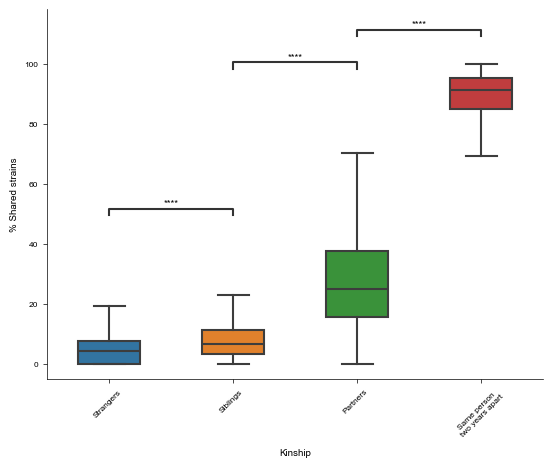

In [37]:
from statannot import add_stat_annotation

relation = pd.read_csv('sharing_bc_ja_relationship.csv')
vc = relation['Relation'].value_counts()
#relation = relation.reset_index('Relation')
relation['Total'] = relation[['True', 'False']].sum(axis=1)
relation = relation[relation['Total'] >= 10].dropna() # total is for strain, dropna is for bc
relation['True'] = relation['True']/relation['Total']
relation['TrueP'] = 100*relation['True']
relation['False'] = relation['False']/relation['Total']
relation = pd.concat([relation[relation['Relation'] == 'no_connection'].sample(5000, random_state=42),
                      relation[relation['Relation'] != 'no_connection']])

#rcParams['font.size'] = 7.5
#rcParams['figure.figsize'] = [7*0.393701, 5*0.393701]

order = {'no_connection': f'Strangers\nn={vc["no_connection"]:,}',
         'siblings': f'Siblings\nn={vc["siblings"]:,}',
#          'parent_child': f'Parent&child\nn={vc["parent_child"]:,}',
         'shared_household': f'Partners\nn={vc["shared_household"]:,}',
         'same_person': f'Same person\ntwo years apart\nn={vc["same_person"]:,}'}#Same person\nbaseline vs 2ys

ax = sns.boxplot(x='Relation', y='TrueP', hue='Relation', data=relation[relation['Relation'].isin(order.keys())],
                 order=order.keys(), hue_order=order.keys(), dodge=False, width=0.5, fliersize=0)
_ = ax.set_xlabel('Kinship')
_ = ax.set_ylabel('% Shared strains')
# _ = ax.set_xticklabels(order.values())
_ = ax.set_xticklabels([l.split('n=')[0]for l in order.values()], rotation=45)

_ = ax.get_legend().set_visible(False)
# _ = ax.legend(ax.get_legend_handles_labels()[0], [v.split('\nn=')[0] for v in order.values()], loc='upper left', title='Kinship')
# _ = ax.legend(ax.get_legend_handles_labels()[0], [v.split('\n')[0] for v in order.values()], loc='upper left', title='Kinship')

box_pairs = [(list(order.keys())[i], list(order.keys())[i+1]) for i in np.arange(len(order)-1)]
_ = add_stat_annotation(ax, x='Relation', y='TrueP', data=relation[relation['Relation'].isin(order.keys())],
                        order=order.keys(),
                        box_pairs=box_pairs, test='t-test_ind', text_format='star', verbose=0)#, loc='outside')